In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# import stats libraries
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

# import linear regression to use with RFE
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# we will be using min max scaler for scaling numerical variables
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split

# evaluation related imports
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [4]:
#Importing dataset
boombikes  = pd.read_csv('boombikes.csv')
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# drop the instant column since it is just index
boombikes.drop('instant', axis=1, inplace=True)

In [6]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


In [7]:
boombikes.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# inspect null values
boombikes.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
boombikes.yr.value_counts()

1    365
0    365
Name: yr, dtype: int64

In [10]:
boombikes.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [11]:
boombikes.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [12]:
boombikes.hum.value_counts()

61.3333    4
69.7083    3
59.0000    3
57.0000    3
72.9583    3
          ..
64.7917    1
44.9583    1
71.2083    1
50.0417    1
49.8750    1
Name: hum, Length: 594, dtype: int64

In [13]:
boombikes.temp.value_counts()

10.899153    5
26.035000    5
23.130847    4
28.563347    4
27.880000    4
            ..
27.025847    1
19.270000    1
13.191299    1
24.155847    1
5.526103     1
Name: temp, Length: 498, dtype: int64

In [14]:
boombikes.weekday.value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

### Numerical variables
- temp
- atemp
- windspeed
- hum

### Categorical variables
- workingday - binary
- weathersit - cat
- weekday-  cat
- season - cat
- months - cat
- holiday -binary

In [15]:
# convert dteday to datetime
boombikes.head()
boombikes['dteday'] = pd.to_datetime(boombikes['dteday'])

boombikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [16]:
# convert categorical variables to object types
boombikes = boombikes.astype({
                 'weathersit' :object,
                 'weekday':object, 
                 'season' :object,
                 'mnth':object
#     ,'workingday' :object,    'holiday' :object
               })

### Visualising numerical variables

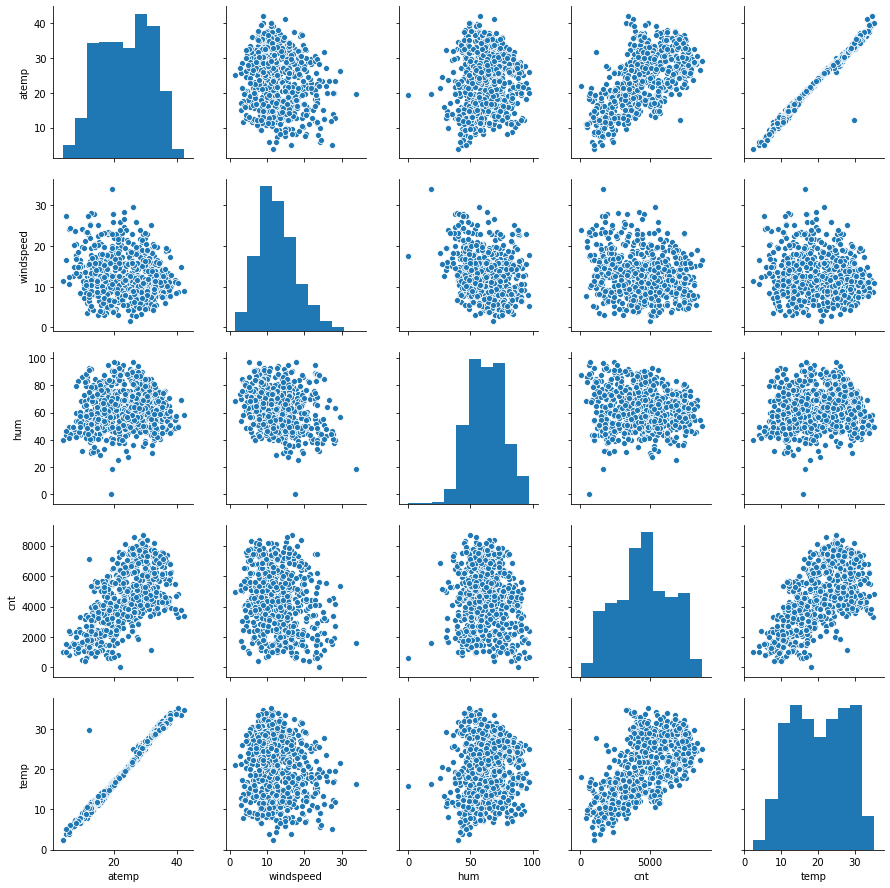

In [17]:
numerical_variables= ['atemp','windspeed','hum',  'cnt','temp']
sns.pairplot(boombikes[numerical_variables])
plt.show()

### Observation
*** All the four numeric variables(temp, atemp, windspeed, hum) seem to have some sort of linear relation ship with the cnt. ***

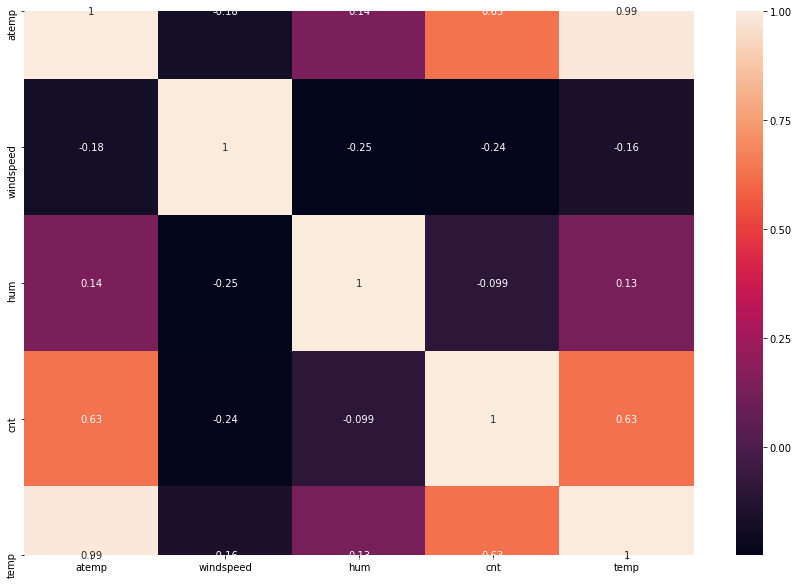

In [18]:
# looking at correlation of selected columns
plt.figure(figsize = (15,10))        
sns.heatmap(boombikes[numerical_variables].corr(),annot = True)

### Observation
- atemp and temp are highly corrlated 
- temp , atemp are highly correlated with the target variable **cnt**

### Time Series Data

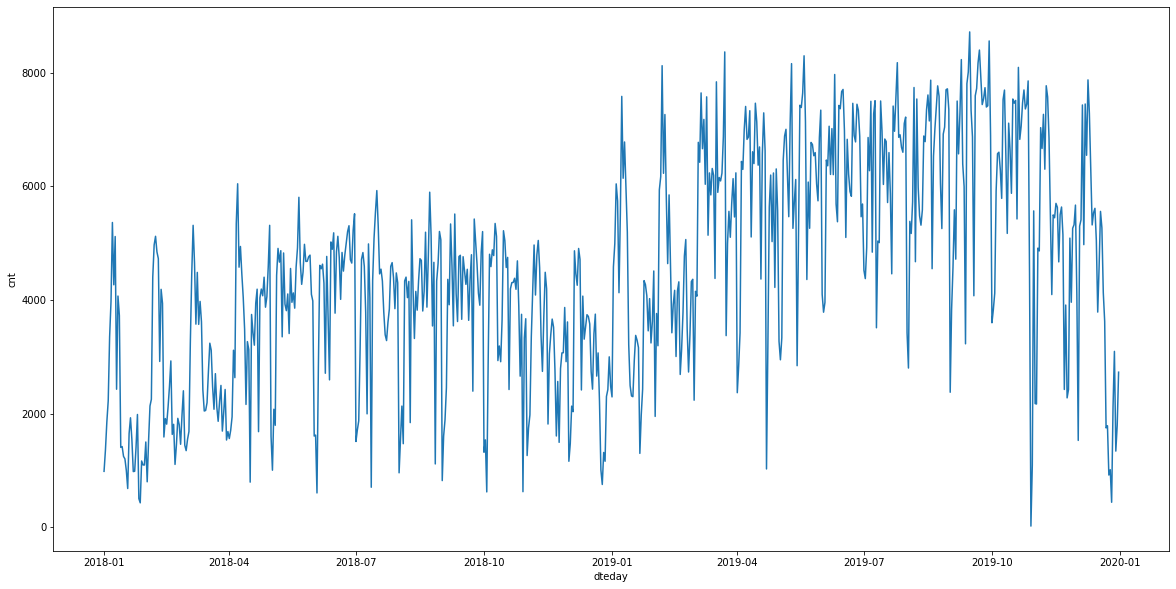

In [19]:
plt.figure(figsize=(20,10))
sns.lineplot(x='dteday', y='cnt', data=boombikes)

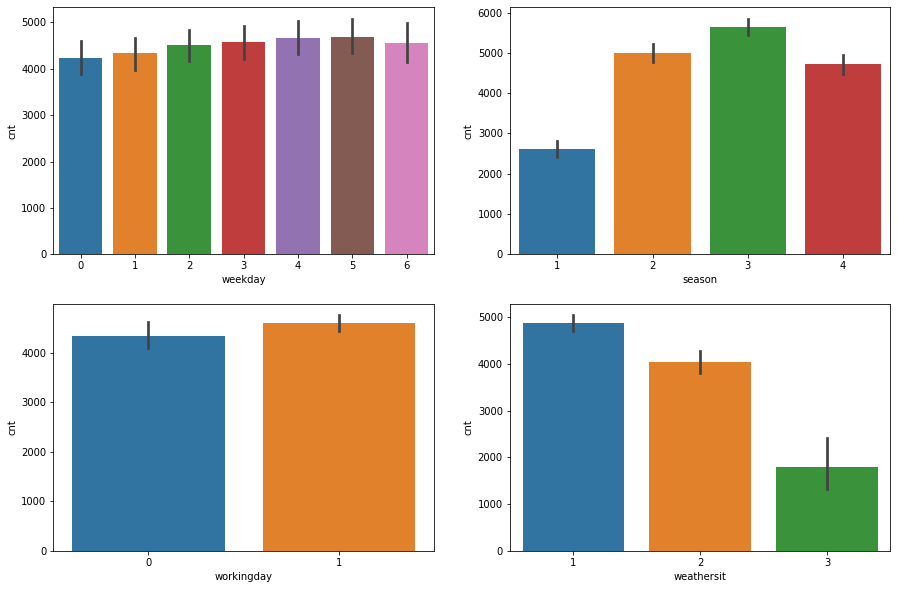

In [20]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.barplot(x='weekday', y='cnt', data=boombikes)

plt.subplot(222)
sns.barplot(x='season', y='cnt', data=boombikes)

plt.subplot(223)
sns.barplot(x='workingday', y='cnt', data=boombikes)

plt.subplot(224)
sns.barplot(x='weathersit', y='cnt', data=boombikes)

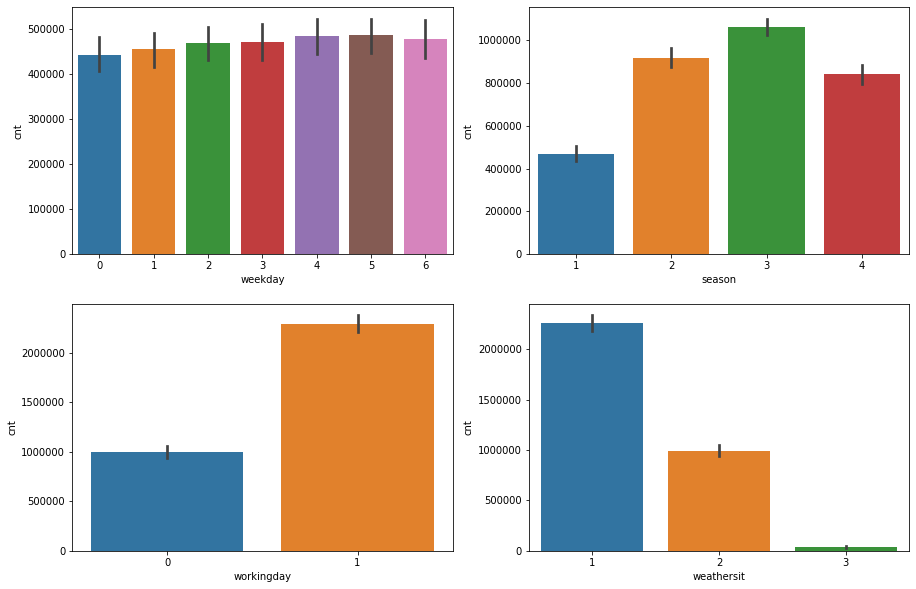

In [21]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.barplot(x='weekday', y='cnt', data=boombikes, estimator=sum)

plt.subplot(222)
sns.barplot(x='season', y='cnt', data=boombikes, estimator=sum)

plt.subplot(223)
sns.barplot(x='workingday', y='cnt', data=boombikes, estimator=sum)

plt.subplot(224)
sns.barplot(x='weathersit', y='cnt', data=boombikes, estimator=sum)

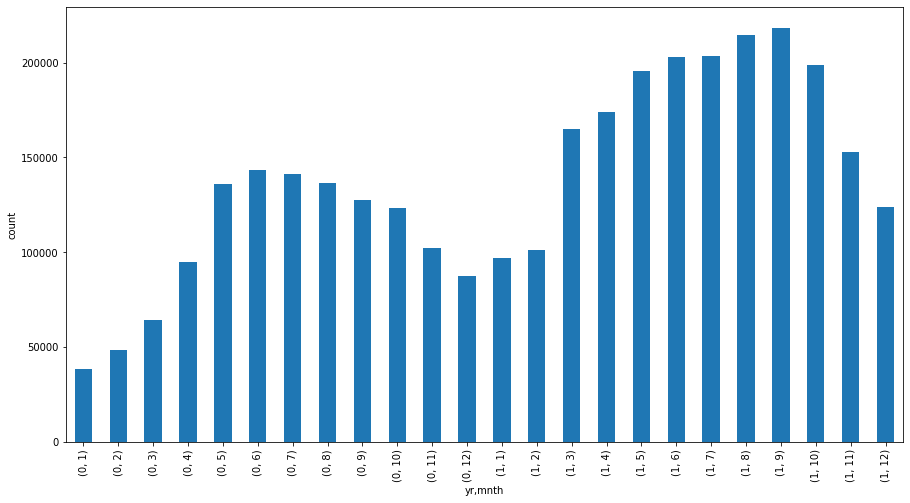

In [22]:
# figure 3
plt.figure(figsize=(15,8))
plt.ylabel('count')
boombikes.groupby(by=[ 'yr', 'mnth'])['cnt'].sum().plot.bar()

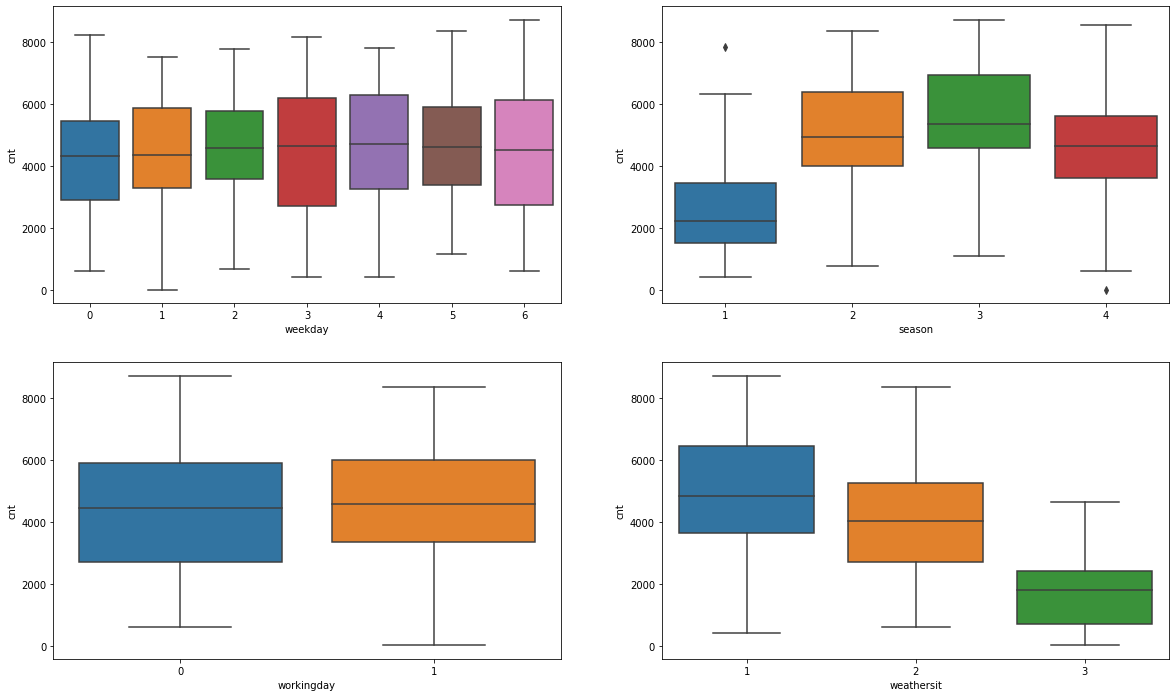

In [23]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'weekday', y = 'cnt', data = boombikes)
plt.subplot(2,2,2)
sns.boxplot(x = 'season', y = 'cnt', data = boombikes)
plt.subplot(2,2,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = boombikes)
plt.subplot(2,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = boombikes)
plt.show()

### Observation
- During Fall (season), highest number of bookings are recorded.
- Bookings are very high on working days then on non-working days. People prefer to use bike service for travelling to work.
- People are more likely to use bike service on a clear or partly cloudly day. and hardly use the service during snow season. 
- from figure 3 it is clear that over the two years the demand for bikes has increased
- this also confirms that during winters i.e. months january ,feb, november, december demand decreases significantly

In [24]:
# drop the date column since we are not looking at time series data
boombikes.drop('dteday', axis=1, inplace=True)
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(6), object(4)
memory usage: 80.0+ KB


In [25]:
#drop casual and registered columns
boombikes.drop(['casual', 'registered'], axis=1, inplace=True)
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [26]:
boombikes.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

## Handling categorical data.
- Using data dictonary where applicable 
- Convert to dummies

In [27]:
# map season to strings. 
boombikes.season = boombikes.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
boombikes.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [28]:
# convert seasons to dummies
seasons = pd.get_dummies(boombikes['season'], prefix='season', drop_first=True)
boombikes = pd.concat([boombikes, seasons], axis=1)
boombikes.drop('season', axis=1, inplace=True)
boombikes.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [29]:
#convert months to dummies
months = pd.get_dummies(boombikes['mnth'], prefix='month', drop_first=True)
boombikes = pd.concat([boombikes, months], axis=1)
boombikes.drop('mnth', axis=1, inplace=True)
boombikes.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


In [30]:
boombikes.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [31]:
#convert weathersit to dummies
weathersit = pd.get_dummies(boombikes['weathersit'], prefix='weathersit', drop_first=True)
boombikes = pd.concat([boombikes, weathersit], axis=1)
boombikes.drop('weathersit', axis=1, inplace=True)
boombikes.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weathersit_2,weathersit_3
0,0,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,0


In [32]:
boombikes.weekday.value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

In [33]:
#convert weekday to dummies

weekday = pd.get_dummies(boombikes['weekday'], prefix='weekday', drop_first=True)
boombikes = pd.concat([boombikes, weekday], axis=1)
boombikes.drop('weekday', axis=1, inplace=True)
boombikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,month_11,month_12,weathersit_2,weathersit_3,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,0,0,0


In [34]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
yr               730 non-null int64
holiday          730 non-null int64
workingday       730 non-null int64
temp             730 non-null float64
atemp            730 non-null float64
hum              730 non-null float64
windspeed        730 non-null float64
cnt              730 non-null int64
season_spring    730 non-null uint8
season_summer    730 non-null uint8
season_winter    730 non-null uint8
month_2          730 non-null uint8
month_3          730 non-null uint8
month_4          730 non-null uint8
month_5          730 non-null uint8
month_6          730 non-null uint8
month_7          730 non-null uint8
month_8          730 non-null uint8
month_9          730 non-null uint8
month_10         730 non-null uint8
month_11         730 non-null uint8
month_12         730 non-null uint8
weathersit_2     730 non-null uint8
weathersit_3     730 non-null uint8
weekday_1        730 no

In [35]:
# split the data in 70/30 ration , we also specify randomstate so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(boombikes, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the numerical variables on train data set

In [36]:
# initialize the scaler
scaler = StandardScaler()

#### We do not scale the target variable

In [37]:
num_vars = ['temp','atemp','windspeed','hum']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,month_11,month_12,weathersit_2,weathersit_3,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
653,1,0,1,-0.121335,-0.055878,-0.514725,-0.117752,7534,0,0,...,0,0,0,0,0,1,0,0,0,0
576,1,0,1,1.231731,1.194106,0.516433,-0.330615,7216,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,-0.420478,-0.348834,-0.069854,-0.385694,4066,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,-1.294913,-1.473492,-1.045032,2.018143,1796,1,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,-0.627580,-0.571474,-1.000840,-0.779889,4220,0,1,...,0,0,1,0,0,0,0,0,0,1


In [38]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building our model using RFE.

- We are using the **LinearRegression function from SciKit Learn** for its compatibility with RFE.
- We start with 15 variables

In [39]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)


In [40]:
# visualize the selected columns
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 12),
 ('hum', False, 6),
 ('windspeed', False, 4),
 ('season_spring', True, 1),
 ('season_summer', False, 5),
 ('season_winter', True, 1),
 ('month_2', False, 3),
 ('month_3', True, 1),
 ('month_4', True, 1),
 ('month_5', True, 1),
 ('month_6', True, 1),
 ('month_7', False, 7),
 ('month_8', True, 1),
 ('month_9', True, 1),
 ('month_10', False, 2),
 ('month_11', False, 8),
 ('month_12', False, 9),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1),
 ('weekday_1', False, 10),
 ('weekday_2', False, 11),
 ('weekday_3', False, 14),
 ('weekday_4', False, 15),
 ('weekday_5', False, 13),
 ('weekday_6', True, 1)]

In [41]:
# select the columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'season_spring', 'season_winter',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_8', 'month_9',
       'weathersit_2', 'weathersit_3', 'weekday_6'],
      dtype='object')

In [42]:
# lets observe intercept and cofficients derived by RFE
print(lm.intercept_)
print(lm.coef_)

2698.3067643076047
[ 2018.34842136  -368.48496784   381.398203     787.03601675
    93.36941077  -192.3098452   -271.86659511  -422.25857515
   332.17073441   916.02721498   264.14519524   555.01423415
   543.81923492   758.43405025   529.0120733    202.42639709
   683.55190264  1254.87474021   610.70346703   180.64404564
   147.70927501  -530.47459414 -2231.21107971   -86.45297899
   -67.38519505    50.61280363    15.69664449   100.44196108
   473.99750544]


In [43]:
## column value and calculated coeeff vallue.
list(zip(col,lm.coef_))

[('yr', 2018.348421360699),
 ('holiday', -368.4849678435466),
 ('workingday', 381.39820300138837),
 ('temp', 787.036016751267),
 ('season_spring', 93.36941076676645),
 ('season_winter', -192.30984519968843),
 ('month_3', -271.86659510768453),
 ('month_4', -422.2585751529695),
 ('month_5', 332.1707344061389),
 ('month_6', 916.0272149750597),
 ('month_8', 264.14519523915203),
 ('month_9', 555.0142341516095),
 ('weathersit_2', 543.8192349248017),
 ('weathersit_3', 758.434050248191),
 ('weekday_6', 529.0120733005465)]

### Observation
- The coefficient values are very high since we have not scaled the target variable. If we scale the target variable coefficient values adjust accordingly. 

### Build the model using statsmodel with the columns selected by rfe for detailed statistics

In [44]:
# create subset from training set using columns selected by RFE
X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,holiday,workingday,temp,season_spring,season_winter,month_3,month_4,month_5,month_6,month_8,month_9,weathersit_2,weathersit_3,weekday_6
653,1,0,1,-0.121335,0,1,0,0,0,0,0,0,0,0,0
576,1,0,1,1.231731,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0,-0.420478,1,0,1,0,0,0,0,0,1,0,1
728,1,0,0,-1.294913,1,0,0,0,0,0,0,0,0,0,0
482,1,0,0,-0.627580,0,0,0,1,0,0,0,0,1,0,1


In [45]:
## calculate VIF for these columns

### we have created a function that accepts and drops the specified column and than calculates the vif.
### going forward we will create a new dataframe for running model. x_train_rfe reflects selected columns and calculates VIF
def calculateVIF(excludeColumn=""):
    if(excludeColumn!=""):
        X_train_rfe.drop(excludeColumn, axis=1, inplace=True)
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

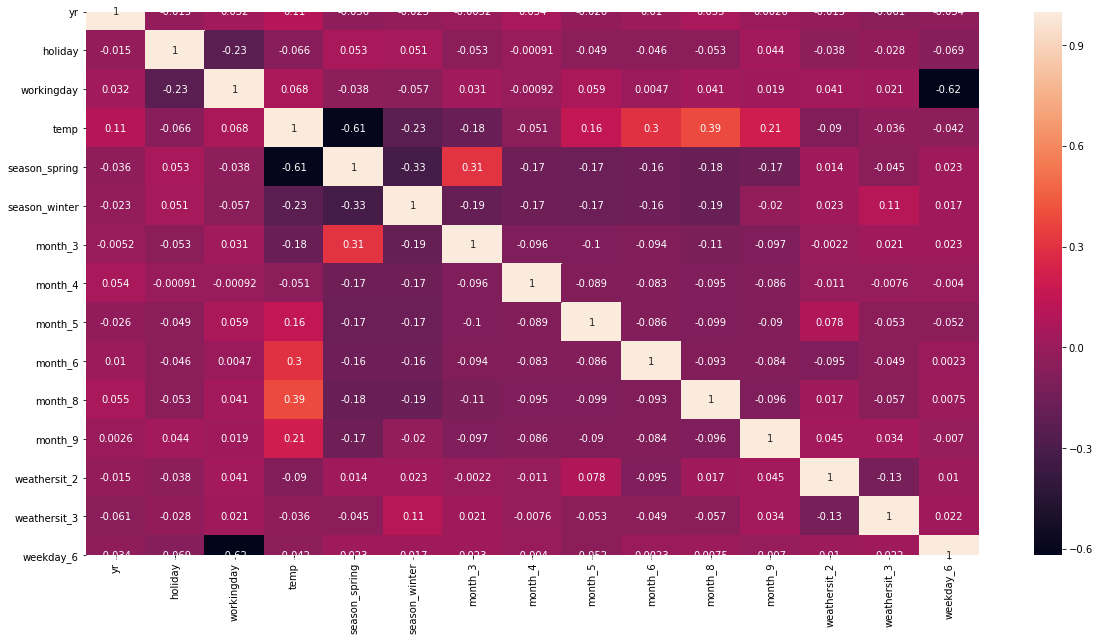

In [46]:
# looking at correlation of selected columns
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train_rfe.corr(),annot = True)

In [47]:
# Adding a constant variable for intercept
X_train_rfe_const = sm.add_constant(X_train_rfe)

In [48]:
lm = sm.OLS(y_train,X_train_rfe_const).fit()  #fit model

In [49]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     163.1
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          2.92e-180
Time:                        01:46:36   Log-Likelihood:                -4132.4
No. Observations:                 510   AIC:                             8297.
Df Residuals:                     494   BIC:                             8365.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3078.7432    151.982     20.257

In [50]:
## calculate VIF for these columns
calculateVIF()

,Features,VIF
2,workingday,4.02
4,season_spring,3.36
3,temp,2.90
5,season_winter,2.36
0,yr,2.01
14,weekday_6,1.68
10,month_8,1.66
12,weathersit_2,1.58
7,month_4,1.41
9,month_6,1.41


#### Observation
- we obeserver that workingday has high VIF value. 
- holiday, month_4, mont_8 have comparitively high pvalues
#### Adjusted R-squared = 0.827 
#### Prob (F-statistic):  2.92e-180

Model is a good fit

In [51]:
## remove workingday as it has high vif
X_train_rfe_const = X_train_rfe_const.drop('workingday', axis=1)
lm = sm.OLS(y_train,X_train_rfe_const ).fit() 
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     169.1
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          2.59e-178
Time:                        01:46:36   Log-Likelihood:                -4139.8
No. Observations:                 510   AIC:                             8310.
Df Residuals:                     495   BIC:                             8373.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3397.8987    128.344     26.475      0.000    3145.733    3650.065
yr             2035.1153     73.947     27.521      0.000    1889.826    2180.404
holiday        -773.7509    234.417     -3.301      0.001   -1234.325    -313.176
temp            865.6349     65.188     13.279      0.000     737.555     993.715
season_spring  -669.1239    171.392     -3.904      0.000   -1005.870    -332.378
season_winter   908.4178    148.100      6.134      0.000     617.435    1199.400
month_3         472.0066    136.749      3.452      0.001     203.327     740.686
month_4         460.1495    181.051      2.542      0.011     104.425     815.874
month_5         735.2548    168.682      4.359      0.000     403.833    1066.677
month_6         489.3336    174.697      2.801      0.005     146.095     832.572
month_8         446.6156    164.405      2.717      0.007     123.598     769.633
month_9         999.2825    157.524      6.344      0.000     689.785    1308.780
weathersit_2   -695.9613     78.866     -8.825      0.000    -850.915    -541.007
weathersit_3  -2600.0812    220.610    -11.786      0.000   -3033.528   -2166.634
weekday_6       144.5014    101.320      1.426      0.154     -54.569     343.572
==============================================================================
Omnibus:                       76.119   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.585
Skew:                          -0.752   Prob(JB):                     3.38e-43
Kurtosis:                       5.635   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
## calculate VIF for these columns
calculateVIF('workingday')

,Features,VIF
2,temp,2.77
3,season_spring,2.52
0,yr,1.96
4,season_winter,1.67
11,weathersit_2,1.54
9,month_8,1.48
8,month_6,1.27
5,month_3,1.24
10,month_9,1.23
6,month_4,1.18


### Observation
- VIF values have decreased considerably for most of the variables.  
- Except **month_4**,**month_8**, **month_6**,  **weekday_6**, Pvalues are already 0. 
- r2 and adjusted r2 have not changed very significantly. 

In [53]:
## remove weekday_6 as it has high p value
X_train_rfe_const = X_train_rfe_const.drop('weekday_6', axis=1)
lm = sm.OLS(y_train,X_train_rfe_const ).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     181.6
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          5.18e-179
Time:                        01:46:36   Log-Likelihood:                -4140.8
No. Observations:                 510   AIC:                             8310.
Df Residuals:                     496   BIC:                             8369.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3422.1194    127.348     26.872      0.000    3171.912    3672.327
yr             2031.9174     73.990     27.462      0.000    1886.544    2177.290
holiday        -797.5916    234.064     -3.408      0.001   -1257.470    -337.713
temp            862.7534     65.225     13.227      0.000     734.602     990.905
season_spring  -670.4263    171.568     -3.908      0.000   -1007.517    -333.336
season_winter   908.7128    148.254      6.129      0.000     617.429    1199.997
month_3         474.1560    136.883      3.464      0.001     205.214     743.098
month_4         459.2025    181.239      2.534      0.012     103.112     815.293
month_5         727.0150    168.759      4.308      0.000     395.444    1058.586
month_6         492.5210    174.864      2.817      0.005     148.955     836.087
month_8         450.9690    164.548      2.741      0.006     127.672     774.266
month_9        1000.3540    157.686      6.344      0.000     690.539    1310.169
weathersit_2   -695.0489     78.946     -8.804      0.000    -850.159    -539.939
weathersit_3  -2595.2830    220.814    -11.753      0.000   -3029.129   -2161.437
==============================================================================
Omnibus:                       69.855   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.384
Skew:                          -0.687   Prob(JB):                     2.49e-40
Kurtosis:                       5.587   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
## calculate VIF for these columns
calculateVIF('weekday_6')

,Features,VIF
2,temp,2.77
3,season_spring,2.48
0,yr,1.96
4,season_winter,1.63
11,weathersit_2,1.54
9,month_8,1.46
8,month_6,1.26
5,month_3,1.24
10,month_9,1.23
7,month_5,1.18


### Observation
- Adjusted RSquared remains unchanged after removing this column
- VIF values are almost unchanged except for a slight change in season_spring

In [55]:
## remove month_4 as it has high p values
X_train_rfe_const = X_train_rfe_const.drop('month_4', axis=1)
lm = sm.OLS(y_train,X_train_rfe_const ).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     194.1
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          8.70e-179
Time:                        01:46:36   Log-Likelihood:                -4144.1
No. Observations:                 510   AIC:                             8314.
Df Residuals:                     497   BIC:                             8369.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3625.5452     99.387     36.479      0.000    3430.274    3820.816
yr             2047.5411     74.134     27.620      0.000    1901.887    2193.195
holiday        -794.7552    235.334     -3.377      0.001   -1257.126    -332.384
temp            807.9462     61.868     13.059      0.000     686.391     929.502
season_spring  -918.4838    141.658     -6.484      0.000   -1196.806    -640.161
season_winter   684.9225    119.718      5.721      0.000     449.706     920.139
month_3         392.4513    133.754      2.934      0.003     129.659     655.244
month_5         544.7526    153.489      3.549      0.000     243.184     846.321
month_6         339.5414    165.002      2.058      0.040      15.354     663.729
month_8         303.7151    154.780      1.962      0.050      -0.388     607.818
month_9         877.1581    150.818      5.816      0.000     580.839    1173.477
weathersit_2   -695.8217     79.375     -8.766      0.000    -851.773    -539.870
weathersit_3  -2604.9175    221.982    -11.735      0.000   -3041.056   -2168.780
==============================================================================
Omnibus:                       72.353   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.370
Skew:                          -0.703   Prob(JB):                     1.02e-42
Kurtosis:                       5.669   Cond. No.                         8.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
## calculate VIF for these columns
calculateVIF('month_4')

,Features,VIF
2,temp,2.72
3,season_spring,2.38
0,yr,1.77
4,season_winter,1.55
10,weathersit_2,1.49
8,month_8,1.46
7,month_6,1.26
5,month_3,1.23
9,month_9,1.22
6,month_5,1.17


### Observation
- Adjusted RSquared remains unchanged after removing this column
- VIF values have reduced for temp and season_spring column

In [57]:
## remove month_8 as high p value
X_train_rfe_const = X_train_rfe_const.drop('month_8', axis=1)
lm = sm.OLS(y_train,X_train_rfe_const ).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     210.2
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          3.95e-179
Time:                        01:46:36   Log-Likelihood:                -4146.1
No. Observations:                 510   AIC:                             8316.
Df Residuals:                     498   BIC:                             8367.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3700.2464     92.069     40.190      0.000    3519.354    3881.139
yr             2045.8775     74.341     27.520      0.000    1899.817    2191.938
holiday        -810.7549    235.864     -3.437      0.001   -1274.167    -347.343
temp            848.3507     58.508     14.500      0.000     733.398     963.303
season_spring  -942.1724    141.546     -6.656      0.000   -1220.273    -664.071
season_winter   631.4123    116.904      5.401      0.000     401.726     861.099
month_3         352.3588    132.562      2.658      0.008      91.910     612.808
month_5         444.5846    145.166      3.063      0.002     159.372     729.797
month_6         220.3724    153.858      1.432      0.153     -81.917     522.662
month_9         783.3323    143.446      5.461      0.000     501.498    1065.166
weathersit_2   -683.8968     79.368     -8.617      0.000    -839.834    -527.960
weathersit_3  -2621.1338    222.462    -11.782      0.000   -3058.213   -2184.055
==============================================================================
Omnibus:                       72.704   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.620
Skew:                          -0.725   Prob(JB):                     1.34e-40
Kurtosis:                       5.557   Cond. No.                         8.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
calculateVIF('month_8')

,Features,VIF
3,season_spring,2.29
2,temp,2.15
0,yr,1.72
4,season_winter,1.55
9,weathersit_2,1.43
5,month_3,1.23
7,month_6,1.18
8,month_9,1.16
6,month_5,1.13
10,weathersit_3,1.06


In [59]:
## remove month_8 as high p value
X_train_rfe_const = X_train_rfe_const.drop('month_6', axis=1)
lm = sm.OLS(y_train,X_train_rfe_const ).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     230.5
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          7.04e-180
Time:                        01:46:36   Log-Likelihood:                -4147.1
No. Observations:                 510   AIC:                             8316.
Df Residuals:                     499   BIC:                             8363.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3740.5465     87.757     42.624      0.000    3568.128    3912.965
yr             2042.2138     74.375     27.458      0.000    1896.087    2188.341
holiday        -819.6413    236.031     -3.473      0.001   -1283.379    -355.904
temp            861.4630     57.848     14.892      0.000     747.807     975.119
season_spring  -959.4078    141.182     -6.796      0.000   -1236.793    -682.023
season_winter   604.2563    115.478      5.233      0.000     377.373     831.139
month_3         334.6372    132.122      2.533      0.012      75.053     594.221
month_5         402.1235    142.256      2.827      0.005     122.629     681.618
month_9         745.2363    141.107      5.281      0.000     467.999    1022.474
weathersit_2   -690.0261     79.336     -8.698      0.000    -845.899    -534.153
weathersit_3  -2633.2705    222.534    -11.833      0.000   -3070.490   -2196.051
==============================================================================
Omnibus:                       72.957   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.455
Skew:                          -0.731   Prob(JB):                     2.40e-40
Kurtosis:                       5.539   Cond. No.                         8.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
calculateVIF('month_6')

,Features,VIF
3,season_spring,2.25
2,temp,1.94
0,yr,1.70
4,season_winter,1.55
8,weathersit_2,1.43
5,month_3,1.23
7,month_9,1.14
6,month_5,1.12
9,weathersit_3,1.06
1,holiday,1.04


In [61]:
## remove month_3 as high p value
X_train_rfe_const = X_train_rfe_const.drop('month_3', axis=1)
lm = sm.OLS(y_train,X_train_rfe_const ).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     252.6
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          1.03e-179
Time:                        01:46:36   Log-Likelihood:                -4150.4
No. Observations:                 510   AIC:                             8321.
Df Residuals:                     500   BIC:                             8363.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3777.6681     86.992     43.426      0.000    3606.754    3948.583
yr             2043.4977     74.775     27.329      0.000    1896.586    2190.409
holiday        -857.6682    236.825     -3.622      0.000   -1322.963    -392.373
temp            852.2039     58.044     14.682      0.000     738.163     966.245
season_spring  -919.8410    141.073     -6.520      0.000   -1197.010    -642.672
season_winter   563.9773    114.995      4.904      0.000     338.043     789.911
month_5         368.7532    142.410      2.589      0.010      88.958     648.548
month_9         723.1138    141.597      5.107      0.000     444.915    1001.312
weathersit_2   -689.1792     79.764     -8.640      0.000    -845.892    -532.466
weathersit_3  -2608.9653    223.528    -11.672      0.000   -3048.135   -2169.795
==============================================================================
Omnibus:                       71.375   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.668
Skew:                          -0.684   Prob(JB):                     1.97e-43
Kurtosis:                       5.717   Cond. No.                         8.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
calculateVIF('month_3')

,Features,VIF
3,season_spring,2.09
2,temp,1.94
0,yr,1.69
4,season_winter,1.54
7,weathersit_2,1.43
6,month_9,1.14
5,month_5,1.11
8,weathersit_3,1.05
1,holiday,1.04


In [63]:
## remove month_3 as high p value
X_train_rfe_const = X_train_rfe_const.drop('month_5', axis=1)
lm = sm.OLS(y_train,X_train_rfe_const ).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     280.2
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          1.65e-179
Time:                        01:46:36   Log-Likelihood:                -4153.8
No. Observations:                 510   AIC:                             8326.
Df Residuals:                     501   BIC:                             8364.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3851.0146     82.718     46.556      0.000    3688.498    4013.531
yr             2036.2262     75.146     27.097      0.000    1888.585    2183.867
holiday        -865.5652    238.150     -3.635      0.000   -1333.461    -397.670
temp            841.8561     58.235     14.456      0.000     727.441     956.272
season_spring -1006.6393    137.811     -7.305      0.000   -1277.397    -735.881
season_winter   488.3548    111.857      4.366      0.000     268.589     708.121
month_9         670.9571    140.953      4.760      0.000     394.026     947.889
weathersit_2   -671.1548     79.910     -8.399      0.000    -828.156    -514.154
weathersit_3  -2623.1741    224.729    -11.673      0.000   -3064.702   -2181.646
==============================================================================
Omnibus:                       68.702   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.037
Skew:                          -0.680   Prob(JB):                     3.61e-39
Kurtosis:                       5.546   Cond. No.                         8.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
calculateVIF('month_5')

,Features,VIF
3,season_spring,2.08
2,temp,1.92
0,yr,1.66
4,season_winter,1.53
6,weathersit_2,1.36
5,month_9,1.13
7,weathersit_3,1.05
1,holiday,1.04


### Observations
- After removing the columns with high p values model still exhibits adjusted rsqaured of .814
- All the variables in the model are now significant.

- We also note that all the variables are in line with our initial observation of the data. 

- Very High Negative coeffecient for weathersit_3 confirms that **Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds** lead to decrease in the bookings.

- Relatively high negative coeffecient for weathersit_2 confirms that **Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist** lead to decrease in bookings. This is in line with general expectations on use of bikes in such weather

- We had observed that count of bookings in **spring<winter<summer<fall**. negative coefficient of season_spring and +ve and not so big coefficient of season_winter confirms this pattern. 

- We had observed that working days see more bookings than holidays. negative coefficient of holiday confirm this. 

In [65]:
# lets try removing the yr variable
## remove month_3 as high p value
X_train_rfe_const_yr = X_train_rfe_const.drop('yr', axis=1)
lm_yr = sm.OLS(y_train,X_train_rfe_const_yr ).fit() 
lm_yr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     87.51
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           7.76e-83
Time:                        01:46:36   Log-Likelihood:                -4383.9
No. Observations:                 510   AIC:                             8784.
Df Residuals:                     502   BIC:                             8818.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4841.5211    116.397     41.595      0.000    4612.835    5070.207
holiday        -941.9452    373.545     -2.522      0.012   -1675.850    -208.040
temp           1005.1809     90.860     11.063      0.000     826.669    1183.693
season_spring  -837.2287    215.953     -3.877      0.000   -1261.511    -412.946
season_winter   595.0804    175.354      3.394      0.001     250.562     939.598
month_9         615.1906    221.081      2.783      0.006     180.833    1049.548
weathersit_2   -692.9138    125.344     -5.528      0.000    -939.178    -446.650
weathersit_3  -2973.1482    351.937     -8.448      0.000   -3664.598   -2281.698
==============================================================================
Omnibus:                       16.221   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.742
Skew:                           0.115   Prob(JB):                       0.0126
Kurtosis:                       2.401   Cond. No.                         7.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observation
- we observe that model accuracy falls sharply if we remove the yr variable. hece we shoul keewp it for now

In [66]:
# lets predict the values on training set using our model
y_train_pred = lm.predict(X_train_rfe_const)

## Calculating rsquared and mean_squared_error

In [67]:
mse = mean_squared_error(y_train, y_train_pred)
r_squared = r2_score(y_train, y_train_pred)

In [68]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 694792.4258663309
r_square_value : 0.8173258013882209


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

Text(0.5, 0, 'Errors')

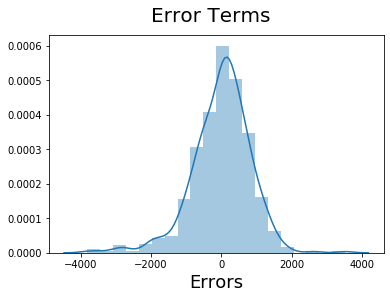

In [69]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

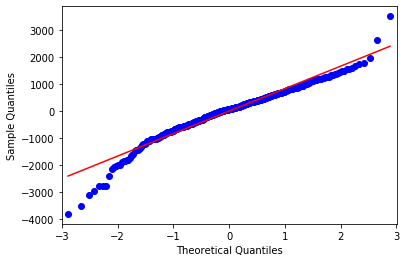

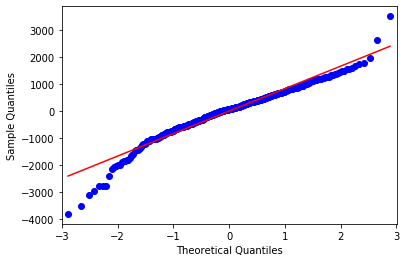

In [70]:
## visualize residuals using qqplot.
qqplot(lm.resid, line='s')

## Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

In [71]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test[num_vars]

,temp,atemp,windspeed,hum
184,1.305371,1.209703,-1.394498,0.047995
535,1.613721,1.553413,-0.984730,-0.276087
299,-0.112129,-0.079386,0.079219,1.285378
221,1.526280,1.330748,0.110839,-1.463381
152,1.240938,1.076847,1.277165,-2.305983
...,...,...,...,...
400,-1.239685,-1.270444,-0.196644,0.401533
702,-0.079915,-0.005099,-0.220305,0.725607
127,0.210028,0.303478,-1.481206,0.003802
640,0.923381,0.799636,-1.583756,1.149853


In [72]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,month_11,month_12,weathersit_2,weathersit_3,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.096083,0.094272,-0.081388,-0.043731,4546.981735,0.255708,0.264840,...,0.073059,0.086758,0.319635,0.027397,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721
std,0.500722,0.188034,0.459904,1.035793,1.026916,1.022197,0.942916,1898.633630,0.437258,0.442259,...,0.260830,0.282125,0.467403,0.163612,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202
min,0.000000,0.000000,0.000000,-2.174744,-2.295437,-2.665411,-2.143341,441.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-0.809372,-0.792914,-0.844689,-0.720691,3303.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.094973,0.170654,-0.155290,-0.125622,4579.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.983209,0.947998,0.641963,0.485055,5869.500000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.981904,2.205446,2.413751,2.869216,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
y_test = df_test.pop('cnt')
X_test = df_test

In [74]:
X_test_sm = X_test[X_train_rfe.columns]
X_test_sm = sm.add_constant(X_test_sm)
X_test_sm.head()

,const,yr,holiday,temp,season_spring,season_winter,month_9,weathersit_2,weathersit_3
184,1.0,0,1,1.305371,0,0,0,1,0
535,1.0,1,0,1.613721,0,0,0,0,0
299,1.0,0,0,-0.112129,0,1,0,1,0
221,1.0,0,0,1.526280,0,0,0,0,0
152,1.0,0,0,1.240938,0,0,0,0,0


In [75]:
y_test_pred = lm.predict(X_test_sm)
y_test_pred

184    3413.229280
535    7245.761798
299    3573.818507
221    5135.922705
152    4895.705527
          ...     
400    3165.809805
702    6308.319070
127    4027.828156
640    6481.794948
72     2076.834543
Length: 219, dtype: float64

Text(0, 0.5, 'y_pred')

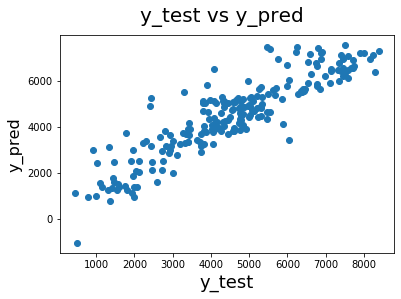

In [76]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

Text(0, 0.5, 'Views')

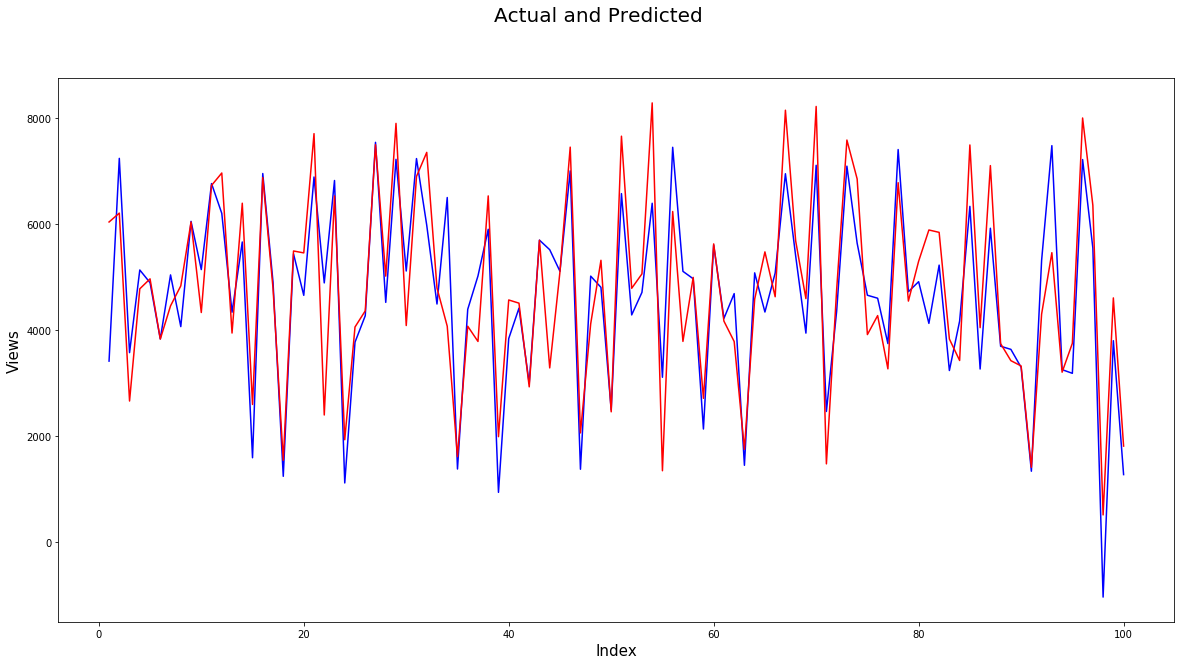

In [77]:
#Actual vs Predicted
c = [i for i in range(1,101)]
fig = plt.figure(figsize=(20,10))
plt.plot(c,y_test_pred[:100], color="blue", linewidth=1.5, linestyle="-")
plt.plot(c,y_test[:100], color="red",  linewidth=1.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=15)                               # X-label
plt.ylabel('Views', fontsize=15)

Text(0, 0.5, 'Views_show-Predicted_views')

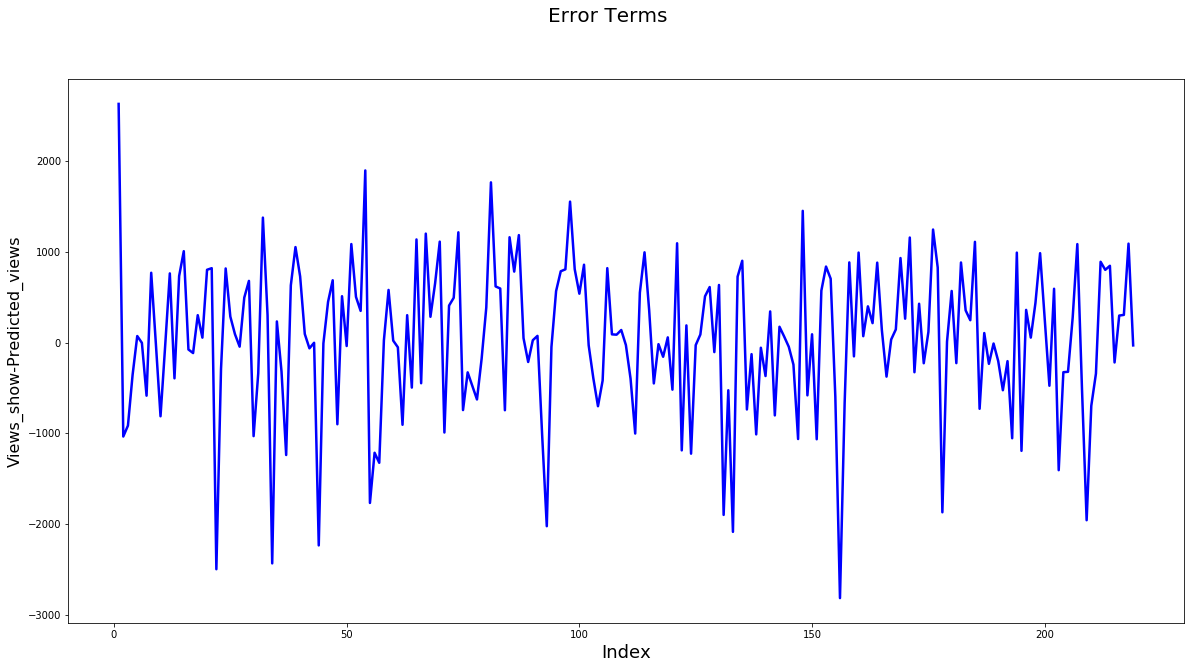

In [78]:
# Error terms
c = [i for i in range(1,len(y_test)+1)]
fig = plt.figure(figsize=(20,10))
plt.plot(c,y_test-y_test_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)          

Text(0.5, 0, 'Errors')

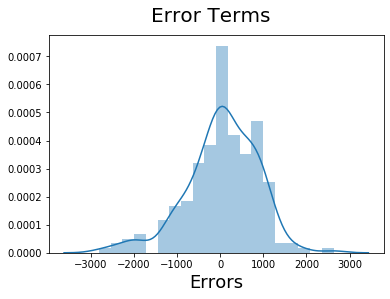

In [79]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test -y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Calculating rsquared and mean_squared_error

In [80]:
mse = mean_squared_error(y_test, y_test_pred)
r_squared = r2_score(y_test, y_test_pred)
print(mse)
print(r_squared)

690299.1734816248
0.8076276561547214


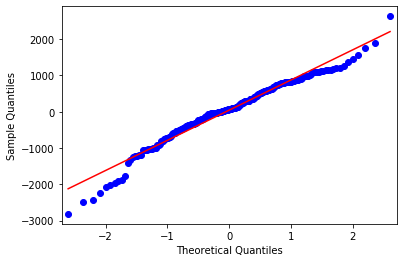

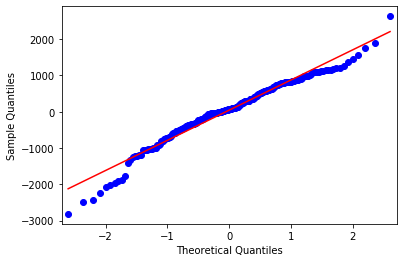

In [81]:
qqplot(y_test-y_test_pred, line='s')